In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS


In [2]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# I) Import data

In [3]:
data = pd.read_csv('1000 companies list and rating.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
data

,company,type,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
0,TCS,IT Services & Consulting,3.8,73.8k Reviews,56 years old,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
1,Accenture,IT Services & Consulting,4.0,46.8k Reviews,35 years old,"Company Culture, Skill Development / Learning,...",NaN
2,Cognizant,IT Services & Consulting,3.9,42.2k Reviews,30 years old,Skill Development / Learning,Promotions / Appraisal
3,Wipro,IT Services & Consulting,3.8,39.6k Reviews,79 years old,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,Capgemini,IT Services & Consulting,3.9,34.3k Reviews,57 years old,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"
...,...,...,...,...,...,...,...
9995,Tag Corporation,Industrial Machinery,3.5,73 Reviews,52 years old,"Salary & Benefits, Promotions / Appraisal, Wor...",NaN
9996,vista Processed foods (A OSI GROUP),Analytics & KPO,4.0,73 Reviews,28 years old,"Job Security, Work Life Balance, Company Culture",Promotions / Appraisal
9997,Systematix Infotech,IT Services & Consulting,3.7,73 Reviews,19 years old,"Job Security, Skill Development / Learning",Promotions / Appraisal
9998,GUVI,EdTech,4.0,73 Reviews,10 years old,"Salary & Benefits, Work Life Balance, Company ...",NaN


In [4]:
data.describe()

,rating
count,10000.000000
mean,3.899740
std,0.384573
min,1.300000
25%,3.700000
50%,3.900000
75%,4.200000
max,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              10000 non-null  object 
 1   type                 9591 non-null   object 
 2   rating               10000 non-null  float64
 3   reviewers            10000 non-null  object 
 4   age                  9211 non-null   object 
 5   highly_ratedFOR      9916 non-null   object 
 6   critically_ratedFOR  2824 non-null   object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [6]:
for c in data.columns:
    numbers_nan = data[c].isna().sum()
    print(f'"{c}" total NaN: {numbers_nan}')

"company" total NaN: 0
"type" total NaN: 409
"rating" total NaN: 0
"reviewers" total NaN: 0
"age" total NaN: 789
"highly_ratedFOR" total NaN: 84
"critically_ratedFOR" total NaN: 7176


# II) processing data

#### 1) fix columns 'reviewers' and 'age'

In [7]:
def fix_reviewers(data):
    result = []
    for val in data:
        try:
            val = val.replace('Reviews', '')
            if 'k' in val:
                val = val.replace('k', '')
            val = float(val) * 1e3
        except:
            val = val
        finally:
            result.append(val)
    return result

def fix_age(data):
    result = []
    for val in data:
        try:
            val = val.replace(' years old', '')
            val = int(val)
        except:
            val = val
        finally:
            result.append(val)
    return result

data['reviewers'] = fix_reviewers(data['reviewers'])
data['age'] = fix_age(data['age'])

In [8]:
data

,company,type,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
0,TCS,IT Services & Consulting,3.8,73800.0,56.0,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
1,Accenture,IT Services & Consulting,4.0,46800.0,35.0,"Company Culture, Skill Development / Learning,...",NaN
2,Cognizant,IT Services & Consulting,3.9,42200.0,30.0,Skill Development / Learning,Promotions / Appraisal
3,Wipro,IT Services & Consulting,3.8,39600.0,79.0,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,Capgemini,IT Services & Consulting,3.9,34300.0,57.0,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"
...,...,...,...,...,...,...,...
9995,Tag Corporation,Industrial Machinery,3.5,73000.0,52.0,"Salary & Benefits, Promotions / Appraisal, Wor...",NaN
9996,vista Processed foods (A OSI GROUP),Analytics & KPO,4.0,73000.0,28.0,"Job Security, Work Life Balance, Company Culture",Promotions / Appraisal
9997,Systematix Infotech,IT Services & Consulting,3.7,73000.0,19.0,"Job Security, Skill Development / Learning",Promotions / Appraisal
9998,GUVI,EdTech,4.0,73000.0,10.0,"Salary & Benefits, Work Life Balance, Company ...",NaN


#### 2) Split data in column 'type'

In [9]:
data_type = data['type'].values
data_type

array(['IT Services & Consulting ', 'IT Services & Consulting ',
       'IT Services & Consulting ', ..., 'IT Services & Consulting ',
       'EdTech ', 'Pharma '], dtype=object)

In [10]:
# Count the number of attributes in the 'type' column of the cell.
sum_ = []
for val in data_type:
    val = str(val)
    count = 0
    if ' & ' in val:
        val = val.split('&')
        count = len(val)
    elif val == 'nan':
        count = 0
    else:
        count = 1
    sum_.append(count)

print(np.unique(sum_), np.max(sum_))

[0 1 2] 2


The maximum number of attributes in a cell is two.

In [11]:
def split_column_type(df):
    data = df['type'].values
    df = df.drop(labels='type', axis=1)
    data_1 = []
    data_2 = []
    for val in data:
        val = str(val)
        if ' & ' in val:
            val = val.split('&')
            data_1.append(val[0].strip())
            data_2.append(val[1].strip())
        elif val == 'nan':
            data_1.append(np.nan)
            data_2.append(np.nan)
        else:
            data_1.append(val.strip())
            data_2.append(np.nan)
    df.insert(loc=1, column='type_1', value=data_1)
    df.insert(loc=2, column='type_2', value=data_2)
    return df

data = split_column_type(data)

In [12]:
data

,company,type_1,type_2,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
0,TCS,IT Services,Consulting,3.8,73800.0,56.0,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
1,Accenture,IT Services,Consulting,4.0,46800.0,35.0,"Company Culture, Skill Development / Learning,...",NaN
2,Cognizant,IT Services,Consulting,3.9,42200.0,30.0,Skill Development / Learning,Promotions / Appraisal
3,Wipro,IT Services,Consulting,3.8,39600.0,79.0,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,Capgemini,IT Services,Consulting,3.9,34300.0,57.0,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"
...,...,...,...,...,...,...,...,...
9995,Tag Corporation,Industrial Machinery,NaN,3.5,73000.0,52.0,"Salary & Benefits, Promotions / Appraisal, Wor...",NaN
9996,vista Processed foods (A OSI GROUP),Analytics,KPO,4.0,73000.0,28.0,"Job Security, Work Life Balance, Company Culture",Promotions / Appraisal
9997,Systematix Infotech,IT Services,Consulting,3.7,73000.0,19.0,"Job Security, Skill Development / Learning",Promotions / Appraisal
9998,GUVI,EdTech,NaN,4.0,73000.0,10.0,"Salary & Benefits, Work Life Balance, Company ...",NaN


#### 3) Split data in column 'highly_ratedFOR' and 'critically_ratedFOR'

In [13]:
# Count the number of attributes in the 'highly_ratedFOR' column of the cell.
data_type_2 = data['highly_ratedFOR'].values
sum_2 = []
for val in data_type_2:
    val = str(val)
    count = 0
    if ',' in val:
        val = val.split(',')
        count = len(val)
    elif val == 'nan':
        count = 0
    else:
        count = 1
    sum_2.append(count)

print(np.unique(sum_2), np.max(sum_2))

[0 1 2 3] 3


The maximum number of attributes in a cell is three.

In [14]:
# Count the number of attributes in the 'highly_ratedFOR' column of the cell.
data_type_3 = data['critically_ratedFOR'].values
sum_3 = []
for val in data_type_3:
    val = str(val)
    count = 0
    if ',' in val:
        val = val.split(',')
        count = len(val)
    elif val == 'nan':
        count = 0
    else:
        count = 1
    sum_3.append(count)

print(np.unique(sum_3), np.max(sum_3))

[0 1 2 3] 3


The maximum number of attributes in a cell is three.

In [15]:
def split_column(df, label, start):
    data_1 = []
    data_2 = []
    data_3 = []
    values = df[f'{label}'].values
    for val in values:
        val = str(val)
        if ',' in val:
            val = val.split(',')
            if len(val) == 2:
                data_1.append(val[0].strip())
                data_2.append(val[1].strip())
                data_3.append(np.nan)
            else:
                data_1.append(val[0].strip())
                data_2.append(val[1].strip())
                data_3.append(val[2].strip())
        elif val == 'nan':
            data_1.append(np.nan)
            data_2.append(np.nan)
            data_3.append(np.nan)
        else:
            data_1.append(val)
            data_2.append(np.nan)
            data_3.append(np.nan)
    df = df.drop(labels=f'{label}', axis=1)
    df.insert(loc=start, column=f'{label}_1', value=data_1)
    df.insert(loc=start+1, column=f'{label}_2', value=data_2)
    df.insert(loc=start+2, column=f'{label}_3', value=data_3)
    return df

data = split_column(data, label='highly_ratedFOR', start=6)

data

,company,type_1,type_2,rating,reviewers,age,highly_ratedFOR_1,highly_ratedFOR_2,highly_ratedFOR_3,critically_ratedFOR
0,TCS,IT Services,Consulting,3.8,73800.0,56.0,Job Security,Work Life Balance,NaN,"Promotions / Appraisal, Salary & Benefits"
1,Accenture,IT Services,Consulting,4.0,46800.0,35.0,Company Culture,Skill Development / Learning,Job Security,NaN
2,Cognizant,IT Services,Consulting,3.9,42200.0,30.0,Skill Development / Learning,NaN,NaN,Promotions / Appraisal
3,Wipro,IT Services,Consulting,3.8,39600.0,79.0,Job Security,NaN,NaN,"Promotions / Appraisal, Salary & Benefits"
4,Capgemini,IT Services,Consulting,3.9,34300.0,57.0,Job Security,Work Life Balance,Skill Development / Learning,"Promotions / Appraisal, Salary & Benefits"
...,...,...,...,...,...,...,...,...,...,...
9995,Tag Corporation,Industrial Machinery,NaN,3.5,73000.0,52.0,Salary & Benefits,Promotions / Appraisal,Work Life Balance,NaN
9996,vista Processed foods (A OSI GROUP),Analytics,KPO,4.0,73000.0,28.0,Job Security,Work Life Balance,Company Culture,Promotions / Appraisal
9997,Systematix Infotech,IT Services,Consulting,3.7,73000.0,19.0,Job Security,Skill Development / Learning,NaN,Promotions / Appraisal
9998,GUVI,EdTech,NaN,4.0,73000.0,10.0,Salary & Benefits,Work Life Balance,Company Culture,NaN


In [16]:
data = split_column(data, label='critically_ratedFOR', start=9)

data

,company,type_1,type_2,rating,reviewers,age,highly_ratedFOR_1,highly_ratedFOR_2,highly_ratedFOR_3,critically_ratedFOR_1,critically_ratedFOR_2,critically_ratedFOR_3
0,TCS,IT Services,Consulting,3.8,73800.0,56.0,Job Security,Work Life Balance,NaN,Promotions / Appraisal,Salary & Benefits,NaN
1,Accenture,IT Services,Consulting,4.0,46800.0,35.0,Company Culture,Skill Development / Learning,Job Security,NaN,NaN,NaN
2,Cognizant,IT Services,Consulting,3.9,42200.0,30.0,Skill Development / Learning,NaN,NaN,Promotions / Appraisal,NaN,NaN
3,Wipro,IT Services,Consulting,3.8,39600.0,79.0,Job Security,NaN,NaN,Promotions / Appraisal,Salary & Benefits,NaN
4,Capgemini,IT Services,Consulting,3.9,34300.0,57.0,Job Security,Work Life Balance,Skill Development / Learning,Promotions / Appraisal,Salary & Benefits,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Tag Corporation,Industrial Machinery,NaN,3.5,73000.0,52.0,Salary & Benefits,Promotions / Appraisal,Work Life Balance,NaN,NaN,NaN
9996,vista Processed foods (A OSI GROUP),Analytics,KPO,4.0,73000.0,28.0,Job Security,Work Life Balance,Company Culture,Promotions / Appraisal,NaN,NaN
9997,Systematix Infotech,IT Services,Consulting,3.7,73000.0,19.0,Job Security,Skill Development / Learning,NaN,Promotions / Appraisal,NaN,NaN
9998,GUVI,EdTech,NaN,4.0,73000.0,10.0,Salary & Benefits,Work Life Balance,Company Culture,NaN,NaN,NaN


# III) EDA

#### 1) Encoder value Pandas

In [17]:
def encoder_pandas(df):
    col = df.columns
    result = df.copy()
    col_scale = []
    values = []
    for c_val in col:
        if df[c_val].dtype == 'object':
            values.append(df[c_val].values)
            col_scale.append(c_val)
    scale = LabelEncoder().fit(np.concatenate(values))
    for c_val in col_scale:
        result[c_val] = scale.transform(df[c_val].values)
    return result

In [18]:
data_encoder = encoder_pandas(data)

data_encoder

,company,type_1,type_2,rating,reviewers,age,highly_ratedFOR_1,highly_ratedFOR_2,highly_ratedFOR_3,critically_ratedFOR_1,critically_ratedFOR_2,critically_ratedFOR_3
0,7923,3782,1843,3.8,73800.0,56.0,4252,8986,9230,6394,7109,9230
1,211,3782,1843,4.0,46800.0,35.0,1801,7495,4252,9230,9230,9230
2,1767,3782,1843,3.9,42200.0,30.0,7495,9230,9230,6394,9230,9230
3,8955,3782,1843,3.8,39600.0,79.0,4252,9230,9230,6394,7109,9230
4,1503,3782,1843,3.9,34300.0,57.0,4252,8986,7495,6394,7109,9230
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7994,3944,9230,3.5,73000.0,52.0,7109,6394,8986,9230,9230,9230
9996,9225,591,4346,4.0,73000.0,28.0,4252,8986,1801,6394,9230,9230
9997,7897,3782,1843,3.7,73000.0,19.0,4252,7495,9230,6394,9230,9230
9998,3026,2427,9230,4.0,73000.0,10.0,7109,8986,1801,9230,9230,9230


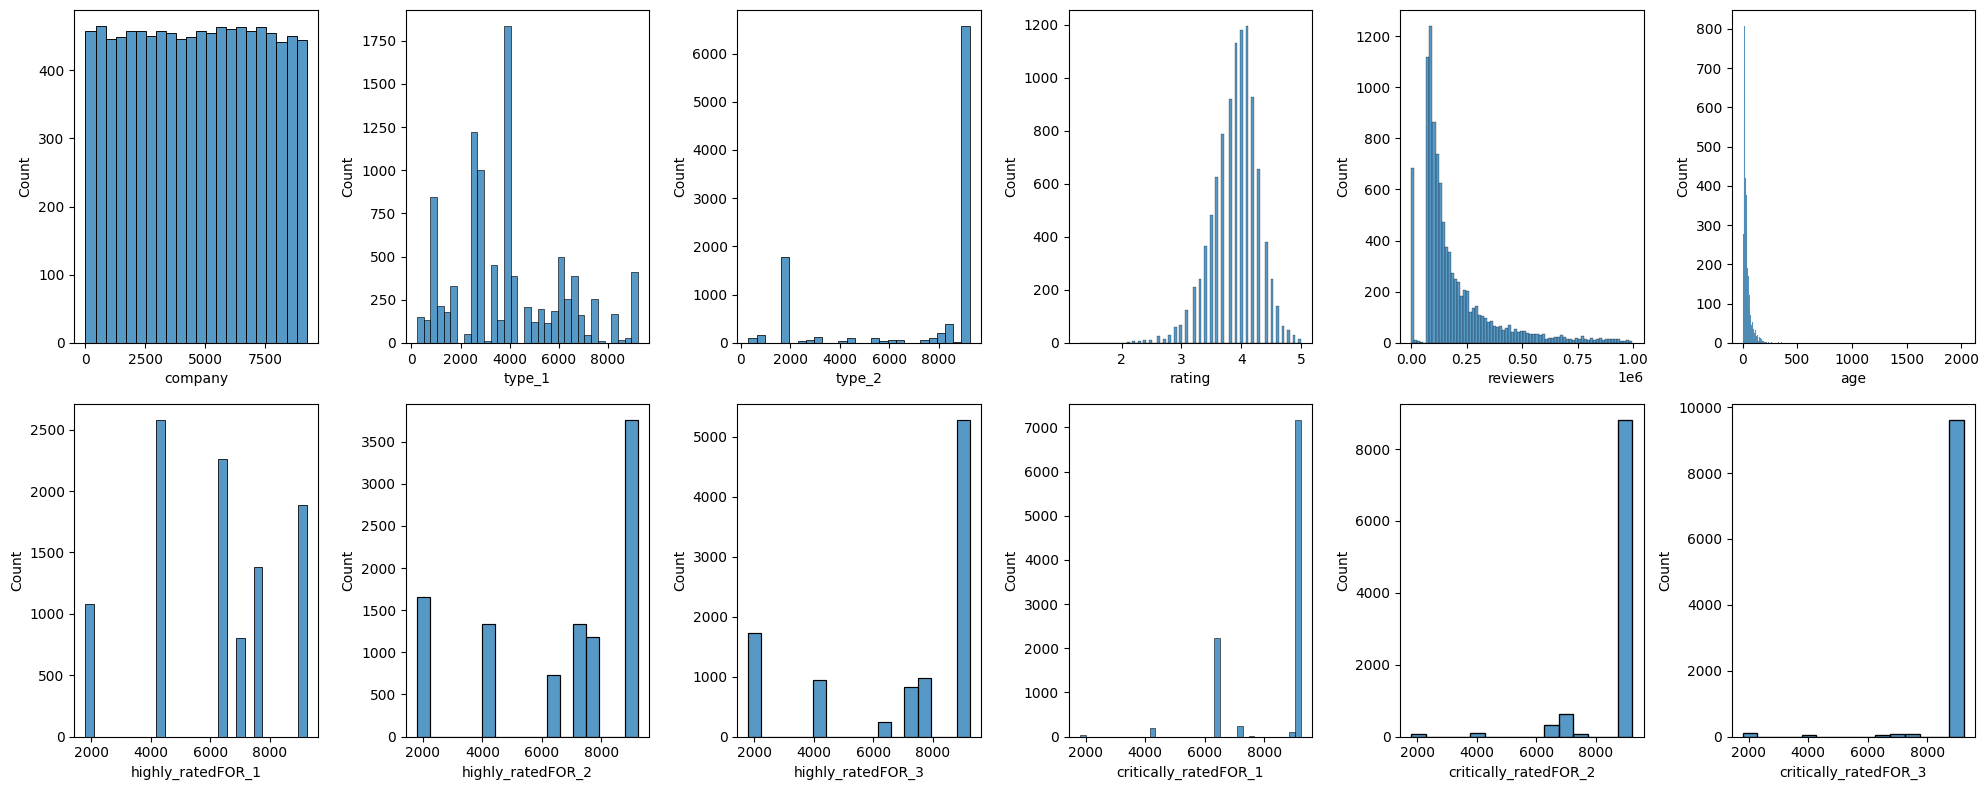

In [19]:
plt.figure(figsize=(20, 8))
for i, c in enumerate(data_encoder.columns):
    plt.subplot(2, 6, i+1)
    sns.histplot(data=data_encoder, x=c)

plt.tight_layout()
plt.show()

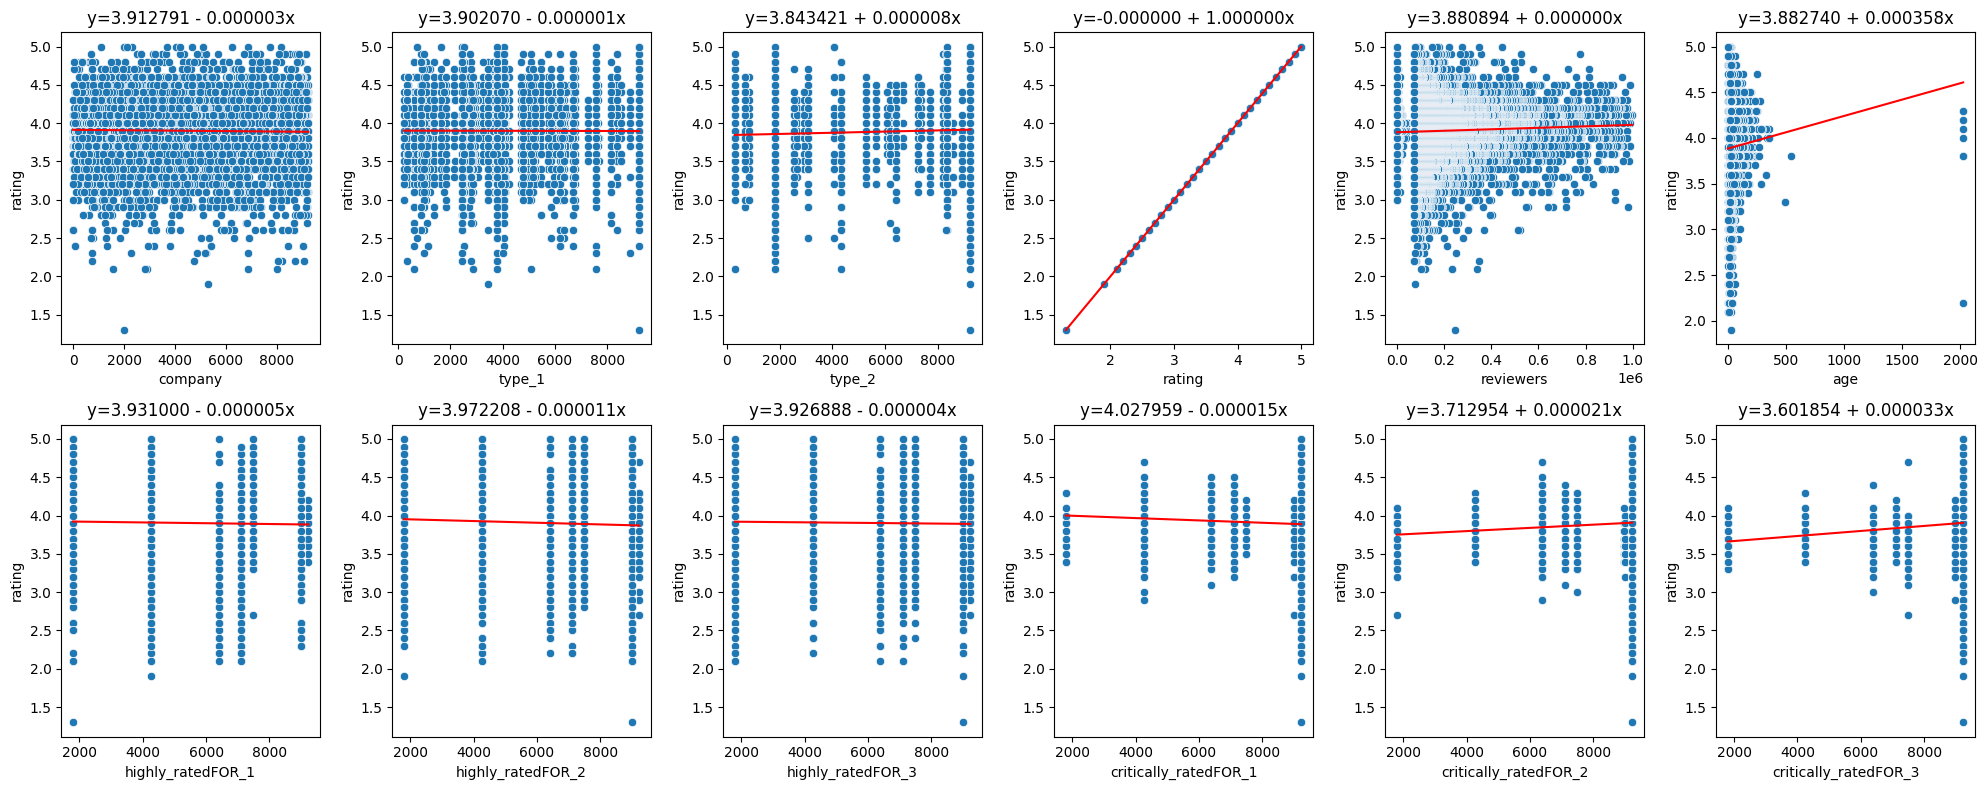

In [20]:
def linear_fit(data_x, data_y):
    x = data_x.values
    y = data_y.values
    
    # Mask NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    
    x_sm = np.linspace(np.min(x), np.max(x), 1000)
    z = np.polyfit(x, y, 1)
    yhat = z[1] + z[0] * x_sm
    return x_sm, yhat, z[1], z[0]


plt.figure(figsize=(20, 8))
for i, c in enumerate(data_encoder.columns):
    plt.subplot(2, 6, i+1)
    sns.scatterplot(data=data_encoder, x=c, y='rating')
    data_fit = linear_fit(data_x=data_encoder[c], data_y=data_encoder['rating'])
    plt.plot(data_fit[0], data_fit[1], color='red')
    a = data_fit[2]
    b = data_fit[3]
    oper = ' + ' if b > 0 else ' - '
    string = f'y={a:.6f}{oper}{np.abs(b):.6f}x'
    plt.title(string)

plt.tight_layout()
plt.show()

In [21]:
corr = data_encoder.corr(numeric_only=True, method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,company,type_1,type_2,rating,reviewers,age,highly_ratedFOR_1,highly_ratedFOR_2,highly_ratedFOR_3,critically_ratedFOR_1,critically_ratedFOR_2,critically_ratedFOR_3
company,1.000000,0.011954,-0.001125,-0.022842,0.013453,-0.024851,-0.014463,-0.010843,0.024565,-0.001256,-0.009548,-0.018294
type_1,0.011954,1.000000,0.144256,-0.011348,-0.034737,-0.089663,-0.004591,-0.005009,-0.001818,0.008427,0.008512,0.005398
type_2,-0.001125,0.144256,1.000000,0.050957,0.007619,0.022080,-0.041468,0.001427,0.004300,-0.018584,0.013913,0.016736
rating,-0.022842,-0.011348,0.050957,1.000000,0.028659,0.160413,0.043554,-0.075610,-0.116226,-0.025645,0.122700,0.164510
reviewers,0.013453,-0.034737,0.007619,0.028659,1.000000,0.044740,-0.034279,-0.006618,0.034815,-0.008464,0.031346,0.035196
age,-0.024851,-0.089663,0.022080,0.160413,0.044740,1.000000,-0.009530,0.014851,0.014809,-0.141102,-0.047413,-0.016595
highly_ratedFOR_1,-0.014463,-0.004591,-0.041468,0.043554,-0.034279,-0.009530,1.000000,-0.140884,-0.016657,-0.046131,-0.023410,-0.011647
highly_ratedFOR_2,-0.010843,-0.005009,0.001427,-0.075610,-0.006618,0.014851,-0.140884,1.000000,0.275971,-0.252773,-0.296110,-0.264356
highly_ratedFOR_3,0.024565,-0.001818,0.004300,-0.116226,0.034815,0.014809,-0.016657,0.275971,1.000000,-0.324234,-0.356603,-0.292206
critically_ratedFOR_1,-0.001256,0.008427,-0.018584,-0.025645,-0.008464,-0.141102,-0.046131,-0.252773,-0.324234,1.000000,0.607014,0.376286


# Visualizer type of company

Text(5, 1500, 'GOOD')

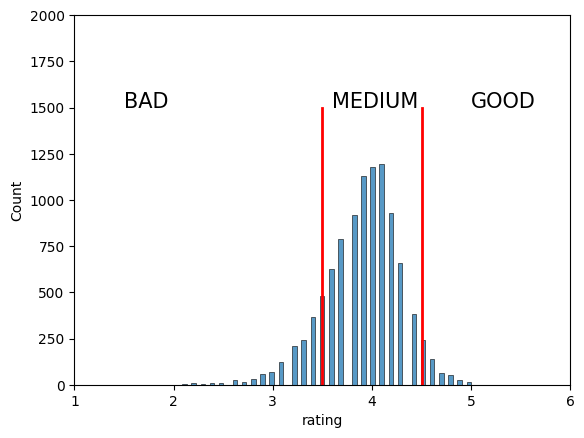

In [22]:
sns.histplot(data['rating'])
plt.plot([3.5, 3.5], [0, 1500], color='red', linewidth=2)
plt.plot([4.5, 4.5], [0, 1500], color='red', linewidth=2)

plt.xlim(1, 6)
plt.ylim(0, 2000)

plt.text(1.5, 1500, "BAD", fontsize=15)
plt.text(3.6, 1500, "MEDIUM", fontsize=15)
plt.text(5, 1500, "GOOD", fontsize=15)

$$
0 \leq \text{rating} < 3.5 \rightarrow \text{BAD COMPANY} \\
3.5 \leq \text{rating} < 4.5 \rightarrow \text{MEDIUM COMPANY} \\
4.5 \leq \text{rating} < 5 \rightarrow \text{GOOD COMPANY} \\
$$

In [23]:
def generateing_word_cloud(df, labels):
    values = []
    stopwords = set(STOPWORDS)
    for col in labels:
        for val in df[col].values:
            if val is np.nan:
                continue
            val = val.replace(' ', '')
            values.append(val)
    text = ' '.join(values)
    return WordCloud(width=1980, height=800, random_state=2024, min_font_size = 20, stopwords=stopwords).generate(text)

### BAD

In [24]:
bad_company = data.where(data['rating'] < 3.5)
bad_company = bad_company.dropna(subset=['company']).reset_index(drop=True)
bad_company

,company,type_1,type_2,rating,reviewers,age,highly_ratedFOR_1,highly_ratedFOR_2,highly_ratedFOR_3,critically_ratedFOR_1,critically_ratedFOR_2,critically_ratedFOR_3
0,BYJU'S,EdTech,NaN,3.1,14700.0,13.0,Job Security,Work Life Balance,Company Culture,NaN,NaN,NaN
1,Startek,BPO,NaN,3.3,6800.0,7.0,Promotions / Appraisal,Salary & Benefits,Work Satisfaction,NaN,NaN,NaN
2,L&T Technology Services,IT Services,Consulting,3.4,3500.0,12.0,Promotions / Appraisal,Salary & Benefits,Work Satisfaction,NaN,NaN,NaN
3,Oyo Rooms,Hospitality,NaN,3.4,3400.0,11.0,Job Security,Promotions / Appraisal,Work Satisfaction,NaN,NaN,NaN
4,CMS IT Services,IT Services,Consulting,3.2,2500.0,10.0,Promotions / Appraisal,Salary & Benefits,Company Culture,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1175,Tata Interactive Systems,IT Services,Consulting,2.2,73000.0,34.0,Promotions / Appraisal,Salary & Benefits,Work Satisfaction,NaN,NaN,NaN
1176,INIFD,Education,Training,3.4,73000.0,29.0,Promotions / Appraisal,Job Security,Work Life Balance,NaN,NaN,NaN
1177,Tata Interactive Systems,IT Services,Consulting,2.2,73000.0,34.0,Promotions / Appraisal,Salary & Benefits,Work Satisfaction,NaN,NaN,NaN
1178,Alteus Biogenics,Pharma,NaN,3.4,73000.0,16.0,Job Security,Promotions / Appraisal,Work Life Balance,NaN,NaN,NaN


In [25]:
col = [
    ['type_1', 'type_2'],
    ['highly_ratedFOR_1', 'highly_ratedFOR_2', 'highly_ratedFOR_3'],
    ['critically_ratedFOR_1', 'critically_ratedFOR_2', 'critically_ratedFOR_3']
]

In [26]:
for c in col:
    print(c)

['type_1', 'type_2']
['highly_ratedFOR_1', 'highly_ratedFOR_2', 'highly_ratedFOR_3']
['critically_ratedFOR_1', 'critically_ratedFOR_2', 'critically_ratedFOR_3']


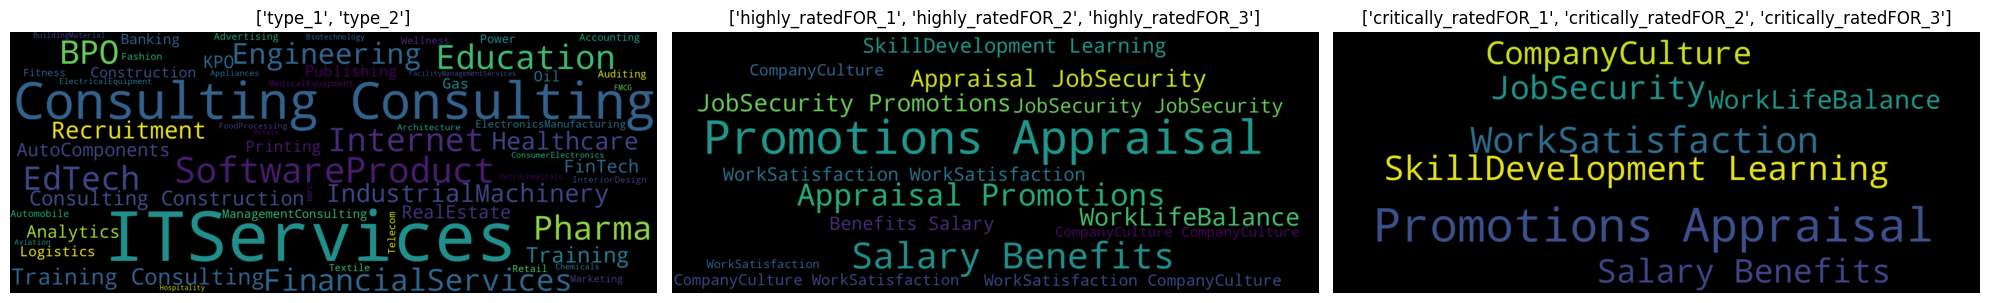

In [27]:
plt.figure(figsize=(20, 10))

for i, c in enumerate(col):
    plt.subplot(1, 3, i+1)
    wordcloud = generateing_word_cloud(bad_company, c)  # Passing labels as a list
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(c, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

### MEDIUM

In [28]:
medium_company = data.where((data['rating'] < 4.5) & (data['rating'] >= 3.5))
medium_company = medium_company.dropna(subset=['company']).reset_index(drop=True)
medium_company

,company,type_1,type_2,rating,reviewers,age,highly_ratedFOR_1,highly_ratedFOR_2,highly_ratedFOR_3,critically_ratedFOR_1,critically_ratedFOR_2,critically_ratedFOR_3
0,TCS,IT Services,Consulting,3.8,73800.0,56.0,Job Security,Work Life Balance,NaN,Promotions / Appraisal,Salary & Benefits,NaN
1,Accenture,IT Services,Consulting,4.0,46800.0,35.0,Company Culture,Skill Development / Learning,Job Security,NaN,NaN,NaN
2,Cognizant,IT Services,Consulting,3.9,42200.0,30.0,Skill Development / Learning,NaN,NaN,Promotions / Appraisal,NaN,NaN
3,Wipro,IT Services,Consulting,3.8,39600.0,79.0,Job Security,NaN,NaN,Promotions / Appraisal,Salary & Benefits,NaN
4,Capgemini,IT Services,Consulting,3.9,34300.0,57.0,Job Security,Work Life Balance,Skill Development / Learning,Promotions / Appraisal,Salary & Benefits,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8279,Tenpath,IT Services,Consulting,4.0,73000.0,22.0,Skill Development / Learning,Job Security,Work Satisfaction,NaN,NaN,NaN
8280,Tag Corporation,Industrial Machinery,NaN,3.5,73000.0,52.0,Salary & Benefits,Promotions / Appraisal,Work Life Balance,NaN,NaN,NaN
8281,vista Processed foods (A OSI GROUP),Analytics,KPO,4.0,73000.0,28.0,Job Security,Work Life Balance,Company Culture,Promotions / Appraisal,NaN,NaN
8282,Systematix Infotech,IT Services,Consulting,3.7,73000.0,19.0,Job Security,Skill Development / Learning,NaN,Promotions / Appraisal,NaN,NaN


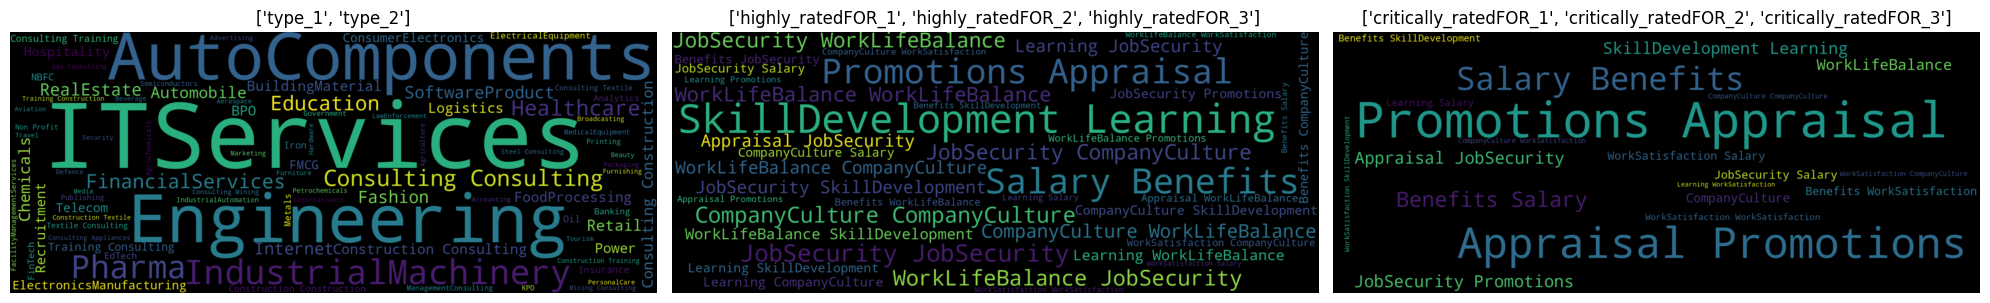

In [29]:
plt.figure(figsize=(20, 10))

for i, c in enumerate(col):
    plt.subplot(1, 3, i+1)
    wordcloud = generateing_word_cloud(medium_company, c)  # Passing labels as a list
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(c, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

### GOOD

In [30]:
good_company = data.where(data['rating'] >= 4.5)
good_company = good_company.dropna(subset=['company']).reset_index(drop=True)
good_company

,company,type_1,type_2,rating,reviewers,age,highly_ratedFOR_1,highly_ratedFOR_2,highly_ratedFOR_3,critically_ratedFOR_1,critically_ratedFOR_2,critically_ratedFOR_3
0,iEnergizer,BPO,NaN,4.6,13600.0,24.0,Company Culture,Skill Development / Learning,Job Security,NaN,NaN,NaN
1,AU Small Finance Bank,Banking,NaN,4.5,8800.0,28.0,Skill Development / Learning,Job Security,Company Culture,NaN,NaN,NaN
2,Indian Army,Defence,Aerospace,4.7,5500.0,129.0,Job Security,Company Culture,Work Satisfaction,NaN,NaN,NaN
3,Kogta Financial India Limited,NBFC,NaN,4.8,3000.0,28.0,Company Culture,Work Life Balance,Work Satisfaction,NaN,NaN,NaN
4,Indian Oil Corporation,Oil,Gas,4.5,2800.0,65.0,Company Culture,Work Life Balance,Skill Development / Learning,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
531,Beroe Inc,Management Consulting,NaN,4.6,73000.0,19.0,Work Life Balance,Job Security,Company Culture,NaN,NaN,NaN
532,Curatio Healthcare,Pharma,NaN,4.7,73000.0,19.0,Company Culture,Work Satisfaction,Skill Development / Learning,NaN,NaN,NaN
533,Pathways World School,Education,Training,4.6,73000.0,21.0,Job Security,Skill Development / Learning,Company Culture,NaN,NaN,NaN
534,Secure Network Solutions,IT Services,Consulting,4.5,73000.0,24.0,Skill Development / Learning,Job Security,Work Satisfaction,NaN,NaN,NaN


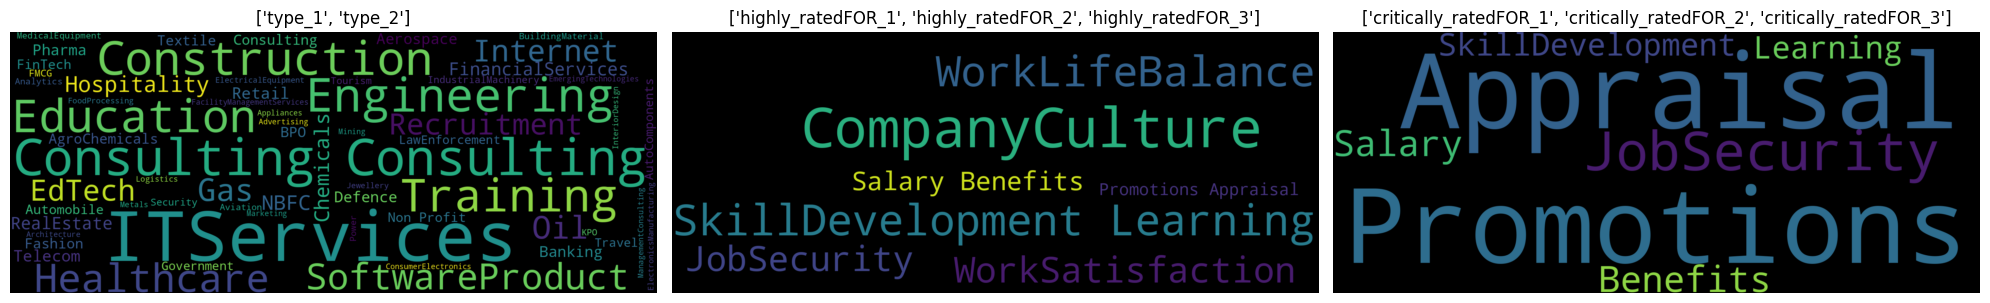

In [31]:
plt.figure(figsize=(20, 10))

for i, c in enumerate(col):
    plt.subplot(1, 3, i+1)
    wordcloud = generateing_word_cloud(good_company, c)  # Passing labels as a list
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(c, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Top 10 companies

In [32]:
top_10 = data.sort_values(by=['rating'], ascending=False).reset_index(drop=True)[:10]
top_10

,company,type_1,type_2,rating,reviewers,age,highly_ratedFOR_1,highly_ratedFOR_2,highly_ratedFOR_3,critically_ratedFOR_1,critically_ratedFOR_2,critically_ratedFOR_3
0,InternEzy,EdTech,NaN,5.0,445000.0,NaN,Work Satisfaction,Skill Development / Learning,Company Culture,NaN,NaN,NaN
1,Teqtous Inc,IT Services,Consulting,5.0,83000.0,NaN,Job Security,Work Life Balance,Work Satisfaction,NaN,NaN,NaN
2,Dr.SNS Rajalakshmi College Of Arts and Science,Education,Training,5.0,221000.0,NaN,Job Security,Promotions / Appraisal,Skill Development / Learning,NaN,NaN,NaN
3,DEEJOS Architects & Constructions,Architecture,Interior Design,5.0,170000.0,16.0,Company Culture,Promotions / Appraisal,Skill Development / Learning,NaN,NaN,NaN
4,Lavender Technology,NaN,NaN,5.0,1000.0,NaN,Skill Development / Learning,Company Culture,Promotions / Appraisal,NaN,NaN,NaN
5,Royal Migration Solutions,NaN,NaN,5.0,347000.0,NaN,Company Culture,Job Security,Skill Development / Learning,NaN,NaN,NaN
6,Plus IT Park,Emerging Technologies,NaN,5.0,77000.0,1.0,Work Life Balance,Work Satisfaction,Job Security,NaN,NaN,NaN
7,Deejos Engineers & Contractors,Architecture,Interior Design,5.0,151000.0,16.0,Company Culture,Work Life Balance,Promotions / Appraisal,NaN,NaN,NaN
8,Basel Technologies,Software Product,NaN,5.0,100000.0,20.0,Job Security,Skill Development / Learning,Salary & Benefits,NaN,NaN,NaN
9,Jayasree Techno Solutions,Chemicals,NaN,5.0,83000.0,8.0,Company Culture,Work Life Balance,Work Satisfaction,NaN,NaN,NaN


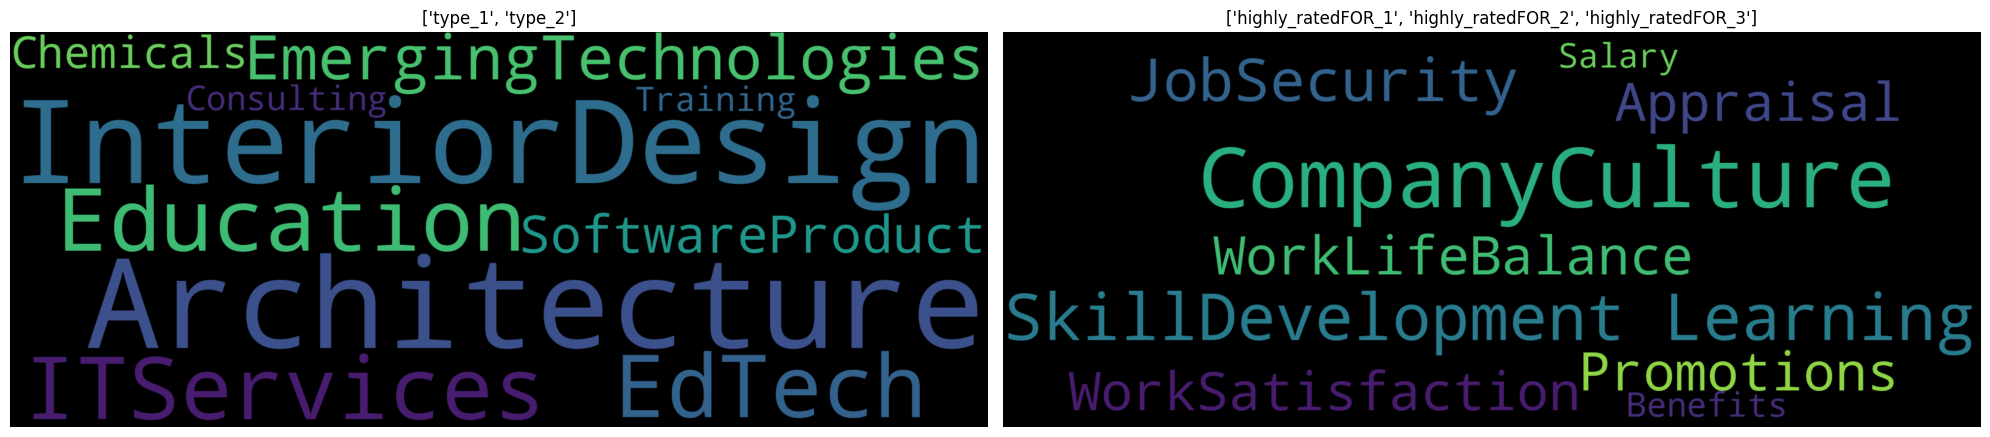

In [34]:
plt.figure(figsize=(20, 10))

for i, c in enumerate(col):
    if i == 2:
        break
    plt.subplot(1, 2, i+1)
    wordcloud = generateing_word_cloud(top_10, c)  # Passing labels as a list
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(c, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()